# 自然语言处理库：NLTK和Gensim
## 1. 完成任务
    1.1 NLTK库
    · 了解NLTK库及其应用方向
    · NLTK库具体应用
    · 代码实现
    1.2 Gensim库
    · 了解Gensim库及其应用方向
    · Gensim库的核心概念
    · 代码实现

## 2. NLTK库简介
    · Natural Language Toolkit(NLTK)，是一个自然语言处理平台，用于建立Python程序来处理人类语言数据。NLTK被称为 "使用Python进行计算语言学教学和工作的绝佳工具"，以及 "一个玩转自然语言的神奇图书馆"。
    · NLTK由Steven Bird和Edward Loper在宾夕法尼亚大学计算机和信息科学系开发，是一个开源的项目，包含：Python模块，数据集和教程，用于NLP的研究和开发。
    · 为50多个语料库和词汇资源（如WordNet）提供了易于使用的接口，以及一套用于文本分类、分词、词干提取、词性标注、句法分析和语义推理等各项NLP领域功能的文本处理库。

## 3. NLTK库具体应用
### 3.1 语料库获取及查看

In [20]:
import nltk
from nltk.corpus import gutenberg    # 古腾堡语料库主要包含一些文学书籍
nltk.corpus.gutenberg.fileids()   # 查看古腾堡语料库包含的文本名称，.fileids()该方法返回语料库中的文本标识列表

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

查看语料库中对应文本的单词、原始字符串、句子。

In [48]:
poems_words = gutenberg.words('blake-poems.txt')   # 查看blake-poems文本的单词；该方法接受一个或多个文本标识作为参数
print(poems_words)

['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...]


In [166]:
poems_raw = gutenberg.raw('blake-poems.txt')    # 查看blake-poems文本的原始字符串；该方法接受一个或多个文本标识作为参数
print(poems_raw[118:199])

INTRODUCTION
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 


In [98]:
poems_sents = gutenberg.sents('blake-poems.txt')   # 查看blake-poems文本的句子；该方法接受一个或多个文本标识作为参数
print(poems_sents)

[['[', 'Poems', 'by', 'William', 'Blake', '1789', ']'], ['SONGS', 'OF', 'INNOCENCE', 'AND', 'OF', 'EXPERIENCE', 'and', 'THE', 'BOOK', 'of', 'THEL'], ...]


获得古腾堡语料库中文本单词、句子、字符串数目。

In [280]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))   # 语料库每个文本的字符数
    num_words = len(gutenberg.words(fileid))   # 语料库每个文本的词数
    num_sents = len(gutenberg.sents(fileid))   # 语料库每个文本的句子数
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    # 查看文本平均词长、句子平均词数、文本中每个词出现的平均次数
    print (int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


### 3.2.2 语料库处理

In [115]:
from nltk.book import *     # 导入book模块提供的文本，包括9本名著和9个句子
text1, text2

(<Text: Moby Dick by Herman Melville 1851>,
 <Text: Sense and Sensibility by Jane Austen 1811>)

In [117]:
sent1

['Call', 'me', 'Ishmael', '.']

In [145]:
text2.concordance('hurt')     # 查看Sense and Sensibility中"hurt"一词的上下文语境

Displaying 10 of 10 matches:
for any sensible man to be lastingly hurt by it .-- It was rather a wish of di
this evening ; for I am sure it must hurt your eyes to work filigree by candle
ou are very good , I hope it won ' t hurt your eyes -- will you ring the bell 
with her ; and she felt particularly hurt that a man so partial to her sister 
aid no more , but looked exceedingly hurt . Impatient in this situation to be 
r .-- A few months ago it would have hurt her exceedingly ; but it was not in 
 ' s audacity . Elinor was much more hurt by Marianne ' s warmth than she had 
ding to do . She will hardly be less hurt , I suppose , by Robert ' s marrying
r marrying her ." " She will be more hurt by it , for Robert always was her fa
s her favourite .-- She will be more hurt by it , and on the same principle wi


In [118]:
text2.similar('grievous')    # 查看Sense and Sensibility中与"grievous"有着相似用法的词汇

unkind disposed equal come proper absurd happy anxious sufficient
unknown willingness cruel


In [146]:
text2.common_contexts(['very', 'pretty'])   # 查看两个词共同的上下文，注意两个词的格式为列表

a_little


In [147]:
text2.count('hurt')   # 查看词在文本中出现的次数

10

In [148]:
text2[770:777]    # 查看文本第770到776个词，注意区间为左闭右开

['so', 'tardy', 'in', 'coming', ',', 'was', 'his']

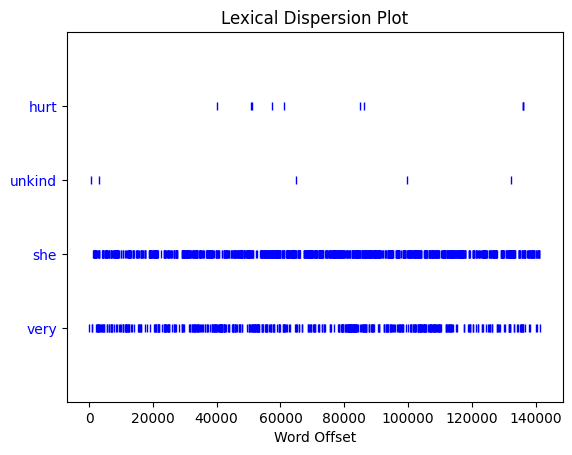

In [161]:
text2.dispersion_plot(['hurt', 'unkind', 'she', 'very'])    # 用离散图表示文本中各个word出现的位置序列

In [168]:
fdist = FreqDist(text2)   # 创建包含给定文本的频率分布
fdist.freq('calm')    # 词语在文本中出现的频率

0.00012714019325309374

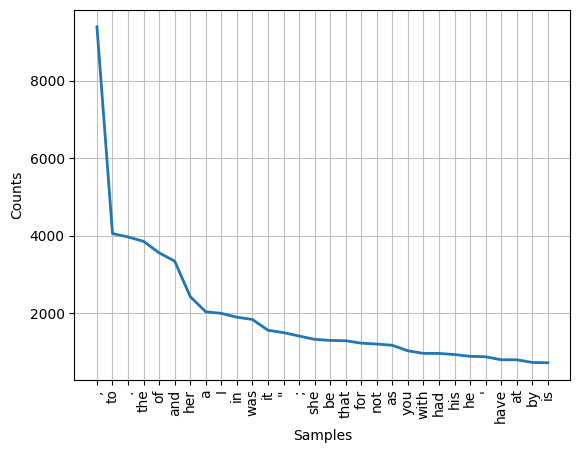

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [172]:
fdist.plot(30, cumulative=False)    # 绘制文本中出现频次前30的词语的频率分布图

## 3.2 文本处理
### 3.2.1 分词
  · 文本是由段落（paragraph）构成的，段落是由句子（sentence）构成的，句子是由单词构成的。切词是文本分析的第一步，它把文本段落分解为较小的实体（如单词或句子），每一个实体叫做一个Token，Token是构成句子（sentence）的单词、是段落（paragraph）的句子。NLTK能够实现句子切分和单词切分两种功能。

In [206]:
text = "FRBs are the brightest, most highly dispersed millisecond-duration astronomical transients in radio bands. Their origins still remain unknown. The astronomers' latest observations revealed a complicated, dynamically evolving, magnetized immediate environment within about an astronomical unit (or distance between the Earth and the Sun) of the radio source, according to the study published in the journal Nature on Wednesday."
tokenized_text = nltk.sent_tokenize(text)    # 对文本进行句子切分
tokenized_text

['FRBs are the brightest, most highly dispersed millisecond-duration astronomical transients in radio bands.',
 'Their origins still remain unknown.',
 "The astronomers' latest observations revealed a complicated, dynamically evolving, magnetized immediate environment within about an astronomical unit (or distance between the Earth and the Sun) of the radio source, according to the study published in the journal Nature on Wednesday."]

In [207]:
tokenized_sent = nltk.word_tokenize(tokenized_text[0])    # 对句子进行单词切分
tokenized_sent

['FRBs',
 'are',
 'the',
 'brightest',
 ',',
 'most',
 'highly',
 'dispersed',
 'millisecond-duration',
 'astronomical',
 'transients',
 'in',
 'radio',
 'bands',
 '.']

### 3.2.2 词语处理
#### 3.2.2.1 去除符号
  噪声是一个非常普遍的术语，对于不同的语料库和不同的任务，它可能意味着不同的东西，一个任务下中被认为是噪声的东西可能对另一个任务来说至关重要，因此这是一种非常特定于领域的预处理技术。噪声包括单词、符号、标点符号、HTML标记（<>*?）、数字等等。这里我们首先练习去除符号。

In [260]:
from nltk.tokenize import RegexpTokenizer    # 正则分词器：RegexpTokenizer，按照自己的规则进行分词
tokenizer = RegexpTokenizer(r'\w+')    # 匹配数字和字母下划线多个字符
sentence = "FRBs are the brightest, most highly <>dispersed millis*econd-duration as,,tronomical transients in radio bands."
print(tokenizer.tokenize(tokenized_text[0]))

['FRBs', 'are', 'the', 'brightest', 'most', 'highly', 'dispersed', 'millisecond', 'duration', 'astronomical', 'transients', 'in', 'radio', 'bands']


#### 3.2.2.2 去除停用词

In [212]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")   # 查看英文停用词表
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [217]:
filtered_word = []
for text in tokenized_text:
    filtered_temp = tokenizer.tokenize(text)   # 对文本进行逐个去除标点符号操作
    filtered_word.append([word for word in filtered_temp if word not in stop_words])   # 对文本逐个进行去除停用词操作
print(filtered_word)

[['FRBs', 'brightest', 'highly', 'dispersed', 'millisecond', 'duration', 'astronomical', 'transients', 'radio', 'bands'], ['Their', 'origins', 'still', 'remain', 'unknown'], ['The', 'astronomers', 'latest', 'observations', 'revealed', 'complicated', 'dynamically', 'evolving', 'magnetized', 'immediate', 'environment', 'within', 'astronomical', 'unit', 'distance', 'Earth', 'Sun', 'radio', 'source', 'according', 'study', 'published', 'journal', 'Nature', 'Wednesday']]


#### 3.2.2.3 词汇规范化
  词汇规范化是指把词的各种派生形式转换为词根。
  1. 词形还原（Lemmatizatizing）
  利用上下文语境和词性来确定相关单词的变化形式，根据词性来获取相关的词根，基于字典的映射,输出结果为真实的单词。

In [222]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  
lemmatizer.lemmatize('lives')   # 进行词形还原

'life'

  2. 词干提取（Stemming）
  从单词中删除词缀并返回词干，可能不是真正的单词。这里采取了NLTK中的两种词干提取方法。

In [229]:
# 基于Porter词干提取算法
from nltk.stem.porter import PorterStemmer  
porter_stemmer = PorterStemmer()  
print(porter_stemmer.stem('lives'))
 
# 基于Snowball词干提取算法
from nltk.stem import SnowballStemmer  
snowball_stemmer = SnowballStemmer("english")  
print(snowball_stemmer.stem('lives'))

live
live


#### 3.2.2.4 词汇释义
  WordNet接口是面向语义的英语词典，类似于传统字典，是NLTK语料库的一部分。查看一个单词的同义词集用synsets(); 它有一个参数pos，可以指定查找的词性。

In [239]:
from nltk.corpus import wordnet
similar_words = wordnet.synsets('grievous')    # 查询相似词
print(similar_words)

print(similar_words[0].definition())   # 查询词的释义
print(similar_words[1].definition())
print(similar_words[2].definition())
print(similar_words[3].definition())

[Synset('dangerous.s.02'), Synset('grievous.s.02'), Synset('grave.s.03'), Synset('atrocious.s.01')]
causing fear or anxiety by threatening great harm
causing or marked by grief or anguish
of great gravity or crucial import; requiring serious thought
shockingly brutal or cruel


### 3.2.3 句法分析
#### 3.2.3.1 词性标注
  词性标记（Part Of Speech Tagging，又称POS tagging）的主要目标是识别给定单词的语法组，POS Tagging查找句子内的关系，并为该单词分配相应的标签。

In [232]:
tokens = nltk.word_tokenize(tokenized_text[0])
tags = nltk.pos_tag(tokens)
print(tags)

[('FRBs', 'NNS'), ('are', 'VBP'), ('the', 'DT'), ('brightest', 'JJS'), (',', ','), ('most', 'JJS'), ('highly', 'RB'), ('dispersed', 'JJ'), ('millisecond-duration', 'NN'), ('astronomical', 'JJ'), ('transients', 'NNS'), ('in', 'IN'), ('radio', 'NN'), ('bands', 'NNS'), ('.', '.')]


#### 3.2.3.2 组块分析
  组块分析（Chunking）是从非结构化文本中提取短语的过程。相对于POS-Tagging来说，POS-Tagging返回了解析树的最底层，就是一个个单词。但是有时候需要的是几个单词构成的名词短语，而非单个单词，在这种情况下可以使用chunker获取需要的信息，而不是浪费时间为句子生成完整的解析树。例如：the market for system-management software是一个名词词组，但是它会被分为两个NP-chunking——the market和system-management software。

In [259]:
sentence = "FRBs are the brightest, most highly dispersed millisecond-duration astronomical transients in radio bands."
grammar = ('''NP: {<DT>?<JJ>*<NN>} # NP''')    # 创建名词短语NP(Noun Phrase)区块，使用一个正则表达式规则来定义分块的语法
chunkParser = nltk.RegexpParser(grammar)
tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
tree = chunkParser.parse(tagged)
for subtree in tree.subtrees():
    print(subtree)
# tree.draw()

(S
  FRBs/NNS
  are/VBP
  the/DT
  brightest/JJS
  ,/,
  most/JJS
  highly/RB
  (NP dispersed/JJ millisecond-duration/NN)
  astronomical/JJ
  transients/NNS
  in/IN
  (NP radio/NN)
  bands/NNS
  ./.)
(NP dispersed/JJ millisecond-duration/NN)
(NP radio/NN)


#### 3.2.3.3 命名实体识别
  命名实体识别（Named Entity Recognition），简称NER，又称作“专名识别”，是指识别文本中具有特定意义的实体，主要包括人名、地名、机构名、专有名词等。通常包括两部分：1)、实体边界识别；2)、确定实体类别（人名、地名、机构名或其他）。

In [249]:
from nltk import ne_chunk, pos_tag,  word_tokenize
sentence = "FRBs are the brightest, most highly dispersed millisecond-duration astronomical transients in radio bands."
print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  FRBs/NNS
  are/VBP
  the/DT
  brightest/JJS
  ,/,
  most/JJS
  highly/RB
  dispersed/JJ
  millisecond-duration/NN
  astronomical/JJ
  transients/NNS
  in/IN
  radio/NN
  bands/NNS
  ./.)


## 4. Gensim库简介
  Gensim是一个免费的开源Python库，用于将文件表示为语义向量。Gensim旨在使用无监督的机器学习算法来处理原始的、非结构化的数字文本（"纯文本"）。Gensim中的算法，如Word2Vec、FastText、Latent Semantic Indexing（LSI、LSA、LsiModel）、Latent Dirichlet Allocation（LDA、LdaModel）等，通过检查训练文档语料库中的统计共现模式自动发现文档的语义结构。这些算法是无监督的，这意味着不需要人工输入——你只需要一个纯文本文档的语料库。一旦发现这些统计模式，任何纯文本文件（句子、短语、单词...）都可以用新的语义表示法简洁地表达出来，并针对其他文件（单词、短语...）进行主题相似性查询。

## 5. Gensim库的核心概念
  在gensim中有一些核心的概念：

    · 文档(Document)：一些文本。
    · 语料库(Corpus)：文档的集合。
    · 矢量(Vector)：一种文档在数学上的表示形式，将文档以一串数字来表示。
    · 模型(Model)：一种将向量从一种表示方法转化为另一种表示方法的算法。
### 5.1 文档(Document)
  在Gensim中，所谓的文档在python3中实际上是一种文本序列类型的对象（str），一个文档可以是一个140个字符的微博，一个单独的段落，或者一本书，都可以称为文档。

In [ ]:
document = "Human machine interface for lab abc computer applications"

### 5.2 语料库(Corpus)
  一个语料库是一组文档对象的集合，在Gensim中，语料库通常有两种功能：
  1、作为训练一个模型的输入。在训练的过程中，模型通过使用训练语料库来去找到公共主题和话题，初始化模型的内部参数。Gensim专注于无监督模型，所以不需要人类的干预，不需要人类来进行注释或者标记文档。
  2、作为一种文档的组织形式。在训练过后，一个主题模型可以用于从新的文档中抽取主题。这样的语料库可以为相似性查询建立索引，通过语义相似性进行查询，进行聚类等。
下面是一个实例语料库。它由9个文档组成，每个文档是由一个单句组成的字符串。

In [265]:
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]      # 创建一个包含9个文档的语料库
stop_list=set('for a of the and to in'.split(' '))
print(stop_list)

{'a', 'of', 'in', 'and', 'for', 'the', 'to'}


In [270]:
# 对每篇文档进行转小写，并且以空格分割，同时过滤掉所有的停止词
texts = [[word for word in document.lower().split() if word not in stop_list]
         for document in text_corpus]
texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [275]:
# 统计词频
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
print(frequency)

defaultdict(<class 'int'>, {'human': 2, 'machine': 1, 'interface': 2, 'lab': 1, 'abc': 1, 'computer': 2, 'applications': 1, 'survey': 2, 'user': 3, 'opinion': 1, 'system': 4, 'response': 2, 'time': 2, 'eps': 2, 'management': 1, 'engineering': 1, 'testing': 1, 'relation': 1, 'perceived': 1, 'error': 1, 'measurement': 1, 'generation': 1, 'random': 1, 'binary': 1, 'unordered': 1, 'trees': 3, 'intersection': 1, 'graph': 3, 'paths': 1, 'minors': 2, 'iv': 1, 'widths': 1, 'well': 1, 'quasi': 1, 'ordering': 1})


In [278]:
# 只保留出现一次以上的单词
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
print(processed_corpus)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


  在处理语料库之前，我们可能希望每一个在语料库中的词都有一个独一无二的ID，那么我们可以使用gensim.corpora.Dictionary类，这个字典可以定义一个词表，词表中包含所有的单词。由于定义的语料库很小，所以在下面的字典中只有12个不同的单词，在很大的语料库当中，这个字典通常包含成百上千个tokens。

In [279]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


### 5.3 向量(Vector)
  为了去得到语料库当中的潜在的结构，需要一种方法来用数学的方法去表示这个文档。一种方法是把每一个文档表示为一个由特征组成的向量。举个例子，一个特征可能看作一个问答对：
  
    1. How many times does the word splonge appear in the document? Zero.
    2. How many paragraphs does the document consist of? Two.
    3. How many fonts does the document use? Five.
    
  问题是一般用来表示的方式好是使用一个int类型的ID，就比如说：（1，0.0）（2，2.0）（3，5.0）。这就是经常说的密集向量，由于它包含了上述问题的明确的答案。如果我们提前知道所有的问题，那么我们可能就把它隐式的表达成（0，2，5）而对应的答案序列的表示就是3维的密集向量。在Gensim中，答案只允许是一个单独的浮点数。在实际的应用中，向量可能包含许多的0值，为了节省内存，gensim忽略了所有包含O.O.的与向量值为0的值。所以上面的例子会是（2，2.0）（3，5.0）这就被大家称为稀疏向量或者词袋向量。在稀疏表示中，所有的缺失的特征可以被明确的表示为0。
  
  另一种方法去表示一个文档，是词袋模型。在词袋模型当中，每一个文档是使用一个包含了所有的词频的向量来表示。比如说，这里有一个字典包含['coffee','milk','sugar','spoon']，然后有这么一篇文档"coffee milk coffee"，可以使用向量[2,1,0,0]来表示这篇文档，其中的数字分别表示"coffee"、"milk"，"sugar"，"spoon"出现的次数。向量的长度取决于整个字典中包含的词的数量。词袋模型的一个主要特性是，它忽略了token的顺序。
  
  我们上文处理过的语料库中有12个不同的词，这意味着在词袋模型下，每个文档将由一个12维的向量表示。我们可以使用字典将文档转化为12维向量。我们可以看到这些ID所对应的内容。

In [281]:
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


  举个例子："Human computer interaction"。这是一个新的短语（在一开始的语料库中不存在），这时我们可以使用doc2bow方法，可以根据单词统计得到一个稀疏向量：

In [282]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


  结果是一个由元组组成的列表，在输出中的元组，第一个数字表示这个token在字典中的ID，第二个数字代表出现的次数。注意"interaction"在一开始的语料库当中没有出现过，所以这个单词并没有出现在结果中。结果中只出现出现在该文档中的单词！由于一篇文档出现的单词的数量一般很少，所以会有大量的频率为0的项，为了节省内存，在gensim里面所有频率为0的单词都会被省略。
  我们可以将前文的语料库全部用向量进行表示。

In [283]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


### 5.4 模型(Model)
  模型：将一种文档表示转换成另一种表示。在将语料库进行向量化之后，就可以把向量传递到模型中。在gensim中，文档都会被转换成向量，模型就可以看作两个向量空间之间的变换。模型在训练的过程中会学习到这个"变换"的细节。举一个例子—— tf-idf,这个模型是将词袋向量转换成另一种向量空间，在这个新的向量空间中，频率根据每一个单词在语料库中真实出现的情况而记录下来。下面是一个简单的例子：

In [285]:
from gensim import models

# 训练模型
tfidf = models.TfidfModel(bow_corpus)
print(tfidf)

# 通过tf-idf将"system minors"字符串转换为向量
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

TfidfModel<num_docs=9, num_nnz=28>
[(5, 0.5898341626740045), (11, 0.8075244024440723)]


  tf-idf模型返回一个由元组组成的列表，第一个数字是token的ID，第二个数字是这个单词的tf-idf值。在训练完成后，这个模型可以保存起来，之后使用的时候再重新加载回来。一旦创建好了模型，就可以接着完成其他工作，比如说，可以将整个语料库都进行转换，完成相似性查询：

In [291]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

# 查询文档'system engineering'与语料库中其他文档的相似性
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 0.32448703), (2, 0.41707572), (3, 0.7184812), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]


  如何理解这个输出：语料库中文档三对比给定的文档相似度为0.718=72%，文档二具有一个相似性分数：42%，等等.可以对这个结果进行排序，方便观察：

In [292]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

3 0.7184812
2 0.41707572
1 0.32448703
0 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


## 参考文献及链接
    [1] 卡蒂克·雷迪·博卡(Karthiek Reddy Bokka) ，舒班吉·霍拉(Shubhangi Hora)，塔努吉·贾因(Tanuj Jain).《基于深度学习的自然语言处理》机械工业出版社，2019.
    [2] https://www.nltk.org
    [3] https://github.com/nltk/nltk_data
    [4] https://radimrehurek.com/gensim/index.html
    [5] http://www.nltk.org/nltk_data/
    [6] https://www.nltk.org/howto/stem.html
    [7] https://github.com/susanli2016/NLP-with-Python
    [8] https://blog.csdn.net/justlpf/article/details/121707391
    [9] https://zhuanlan.zhihu.com/p/22059714
    [10] https://blog.csdn.net/Sirow/article/details/89306934

## 后记
### 被坑指南
  · 下载nltk_data时，nltk.download()运行错误，提示“CERTIFICATE_VERIFY_FAILED] certificate verify failed”；搜索了一下应该是python信任证书的问题，所以选择在github的nltk_data开源数据中进行了下载，并且把packages挪到了对应的目录下面，重命名为nltk_data，问题解决。参考的报错解决方法链接：https://blog.csdn.net/qq_43140627/article/details/103895811 。
  
  · 跟前一个坑很像，前面查看语料库的词语字符串等都成功运行了，但print(poems_sents)命令一直报错。官方给的错误提示是“Resource punkt not found”，而nltk.download()还是没法成功执行，因此去ntlk_data官网下载了puntk，挪到nltk_data/tokenizers的目录下边，问题解决。参考的报错解决方法链接：https://blog.csdn.net/qq_37871657/article/details/124085776
    